
# Convolutional Neural Networks (CNN)

In 1980s, from the study of the brain's visual cortex, the CNN model is first proposed. As computing power and data for training grows, CNNs is now capable of achieving sucessful performance including visual perception, voice recognition, natural language processing, and others. 

Localizing the perceptions, the *convolutional layer* maps the local receptive fields into one hidden node. Once inputs are mapped to hidden units in the first convolutional layer, the first layer is mapped in the same way with local receptive fields to the next convolutional layer.

![](http://webpages.uncc.edu/mlee173/teach/itcs6156/images/class/CNN.png)

To build a convolutional layer to have the same width and height, we can adding *zero padding* around the original image. 

![](http://webpages.uncc.edu/mlee173/teach/itcs6156/images/class/CNN_padding.png)

To reduce the size of the layer, we can increase the *stride* to space out the receptive fields. 
![](http://webpages.uncc.edu/mlee173/teach/itcs6156/images/class/CNN_stride.png)


In [2]:
# preparation

import tensorflow as tf
# Common imports
import numpy as np
import os
import sys

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

import IPython.display as ipd  # for display and clear_output

def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")

def plot_color_image(image):
    plt.imshow(image.astype(np.uint8),interpolation="nearest")
    plt.axis("off")

# CNN Architecture

Figure 13-9 shows the typical CNN archiecture that has a few convolutional layers and poolin layers alternatively connected, which are followed by fully connected layers. 
The image input gets smaller as the network goes deeper. 

![](http://webpages.uncc.edu/mlee173/teach/itcs6156/images/class/CNN_arch.png)


# Filters

Each receptive field are mapped to a real value after applying some weights. There are two possible sets of weights, called *filters* or *convoluution kernels*. 
Simple filters as follows are hightlights an area that is similar to the filter pattern. 
Combining multiple filtered neurons, it learns to combine them into complex patterns. 


In [3]:
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
flower = load_sample_image("flower.jpg")
image = china[150:220, 130:250]
height, width, channels = image.shape
image_grayscale = image.mean(axis=2).astype(np.float32)
images = image_grayscale.reshape(1, height, width, 1)

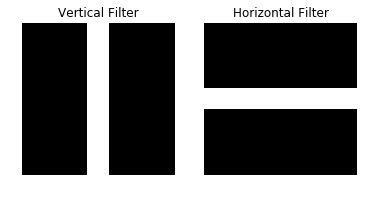

[[ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  1.  1.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]]


In [18]:
fmap = np.zeros(shape=(7, 7, 1, 2), dtype=np.float32)
fmap[:, 3, 0, 0] = 1
fmap[3, :, 0, 1] = 1
plt.figure(figsize=(6,10))
plt.subplot(121)
plot_image(fmap[:, :, 0, 0])
plt.title("Vertical Filter")
plt.subplot(122)
plot_image(fmap[:, :, 0, 1])
plt.title("Horizontal Filter")
plt.show()

print(fmap[:, :, 0, 1])

In [16]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, height, width, 1))
feature_maps = tf.constant(fmap)
convolution = tf.nn.conv2d(X, feature_maps, strides=[1,1,1,1], padding="SAME")

with tf.Session() as sess:
    output = convolution.eval(feed_dict={X: images})

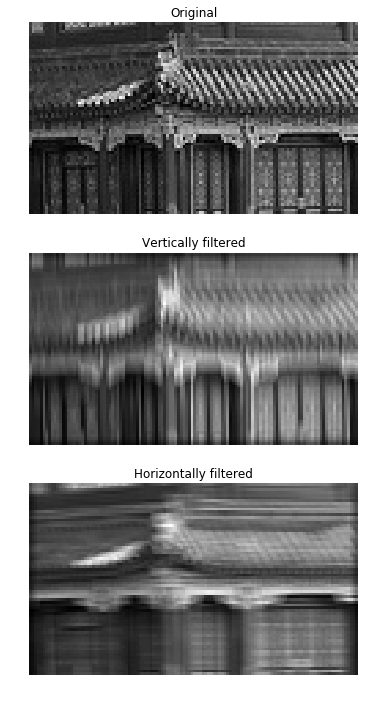

In [17]:
plt.figure(figsize=(6, 12))
plt.subplot(311)
plot_image(images[0, :, :, 0])
plt.title("Original")

plt.subplot(312)
plot_image(output[0, :, :, 0])
plt.title("Vertically filtered")

plt.subplot(313)
plot_image(output[0, :, :, 1])
plt.title("Horizontally filtered")


### layers.conv2d:
To pass the integer for the number of filters. 

In [29]:
reset_graph()

dataset = np.array([china, flower], dtype=np.float32)
batch_size, height, width, channels = dataset.shape

X = tf.placeholder(shape=(None, height, width, channels), dtype=tf.float32)
conv = tf.layers.conv2d(X, filters=4, kernel_size=7, strides=[2,2],
                        padding="SAME")
init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()
    output = sess.run(conv, feed_dict={X: dataset})

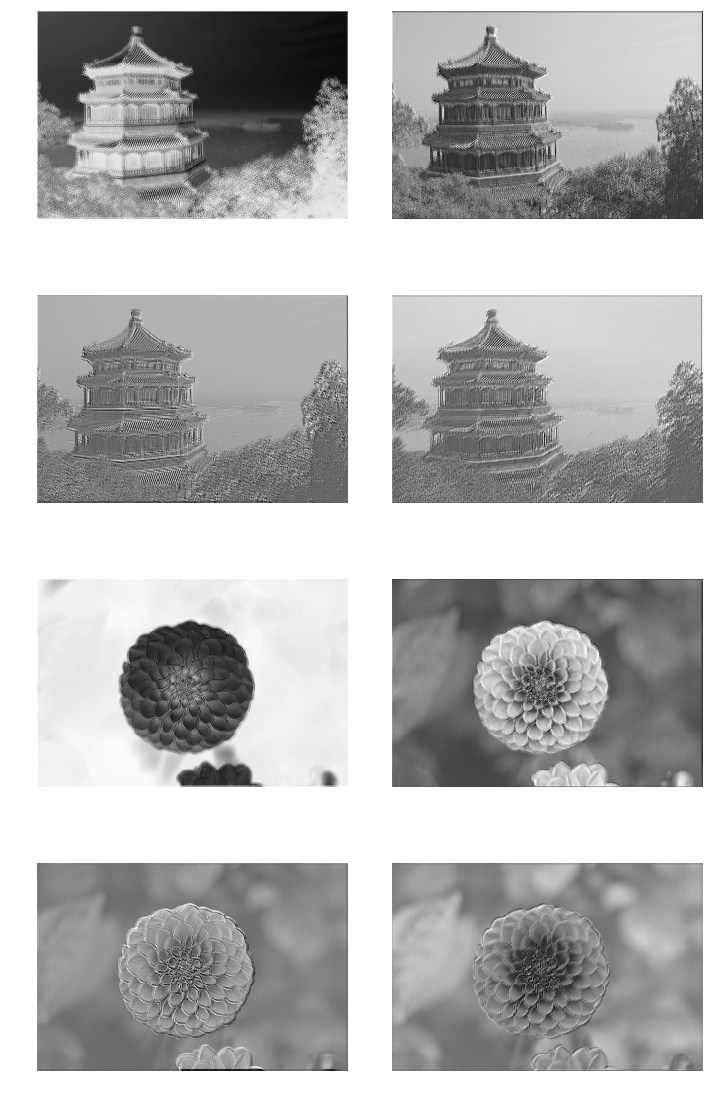

In [38]:
plt.figure(figsize=(10,16))
plt.subplot(421)
plot_image(output[0, :, :, 0])
plt.subplot(422)
plot_image(output[0, :, :, 1])
plt.subplot(423)
plot_image(output[0, :, :, 2])
plt.subplot(424)
plot_image(output[0, :, :, 3])

plt.subplot(425)
plot_image(output[1, :, :, 0])
plt.subplot(426)
plot_image(output[1, :, :, 1])
plt.subplot(427)
plot_image(output[1, :, :, 2])
plt.subplot(428)
plot_image(output[1, :, :, 3])

plt.tight_layout()


# Pooling

To reduuce the computational load, memory usage, and the number of parameters, we use pooling layer (ie. max pooling). 
Without having weights in filters, pooling simply aggregates the values in the receptive field by using max or mean operation.

![](http://webpages.uncc.edu/mlee173/teach/itcs6156/images/class/CNN_maxpool.png)


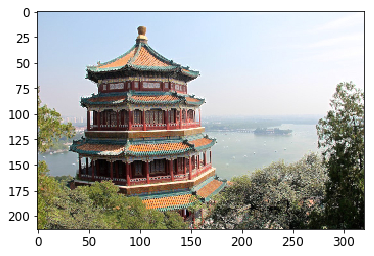

In [39]:
X = tf.placeholder(tf.float32, shape=(None, height, width, channels))
max_pool = tf.nn.max_pool(X, ksize=[1,2,2,1], strides=[1,2,2,1],padding="VALID")

with tf.Session() as sess:
    output = sess.run(max_pool, feed_dict={X: dataset})

plt.imshow(output[0].astype(np.uint8))  # plot the output for the 1st image
plt.show()

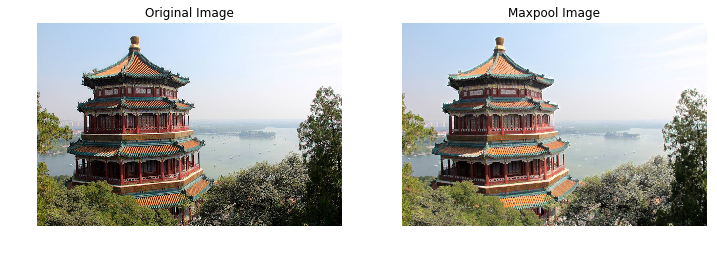

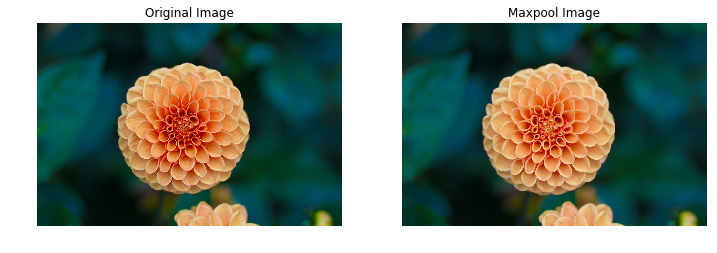

In [49]:

for i in range(2):
    plt.figure(figsize=(12, 12))

    plt.subplot(121)
    plot_color_image(dataset[i])
    plt.title("Original Image")

    plt.subplot(122)
    plot_color_image(output[i].astype(np.uint8))  # plot the output for the 1st image
    plt.title("Maxpool Image")
    plt.show()

# MNIST

Let us build a CNN for MNIST dataset. 

In [50]:
height = 28
width = 28
channels = 1
n_inputs = height * width

conv1_fmaps = 32
conv1_ksize = 3
conv1_stride = 1
conv1_pad = "SAME"

conv2_fmaps = 64
conv2_ksize = 3
conv2_stride = 2
conv2_pad = "SAME"

pool3_fmaps = conv2_fmaps

n_fc1 = 64
n_outputs = 10

reset_graph()

with tf.name_scope("inputs"):
    X = tf.placeholder(tf.float32, shape=[None, n_inputs], name="X")
    X_reshaped = tf.reshape(X, shape=[-1, height, width, channels])
    y = tf.placeholder(tf.int32, shape=[None], name="y")

conv1 = tf.layers.conv2d(X_reshaped, filters=conv1_fmaps, kernel_size=conv1_ksize,
                         strides=conv1_stride, padding=conv1_pad,
                         activation=tf.nn.relu, name="conv1")
conv2 = tf.layers.conv2d(conv1, filters=conv2_fmaps, kernel_size=conv2_ksize,
                         strides=conv2_stride, padding=conv2_pad,
                         activation=tf.nn.relu, name="conv2")

with tf.name_scope("pool3"):
    pool3 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="VALID")
    pool3_flat = tf.reshape(pool3, shape=[-1, pool3_fmaps * 7 * 7])

with tf.name_scope("fc1"):
    fc1 = tf.layers.dense(pool3_flat, n_fc1, activation=tf.nn.relu, name="fc1")

with tf.name_scope("output"):
    logits = tf.layers.dense(fc1, n_outputs, name="output")
    Y_proba = tf.nn.softmax(logits, name="Y_proba")

with tf.name_scope("train"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=y)
    loss = tf.reduce_mean(xentropy)
    optimizer = tf.train.AdamOptimizer()
    training_op = optimizer.minimize(loss)

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

with tf.name_scope("init_and_save"):
    init = tf.global_variables_initializer()
    saver = tf.train.Saver()

## Practice:
Reading the codes, can you draw the architecture?

- Now, let us run this with MNIST data. 

In [51]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/")

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [52]:
n_epochs = 10
batch_size = 100

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: mnist.test.images, y: mnist.test.labels})
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)

        save_path = saver.save(sess, "./my_mnist_model")

0 Train accuracy: 0.99 Test accuracy: 0.9759
1 Train accuracy: 0.99 Test accuracy: 0.9803
2 Train accuracy: 0.97 Test accuracy: 0.9832
3 Train accuracy: 1.0 Test accuracy: 0.9872
4 Train accuracy: 1.0 Test accuracy: 0.9885
5 Train accuracy: 0.97 Test accuracy: 0.9885
6 Train accuracy: 1.0 Test accuracy: 0.9899
7 Train accuracy: 0.99 Test accuracy: 0.989
8 Train accuracy: 1.0 Test accuracy: 0.9881
9 Train accuracy: 1.0 Test accuracy: 0.9885
